#### Importing the dataset

In [2]:
library(purrr)
library(cluster)

In [3]:
online.retail <- read.csv("Online Retail.csv")

In [4]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


#### NA value treatment

In [5]:
order_wise <- na.omit(online.retail)

#### Making RFM data

In [6]:
Amount <- order_wise$Quantity * order_wise$UnitPrice

In [7]:
order_wise <-  order_wise[order(order_wise$CustomerID),]
order_wise

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<int>,<fct>
61620,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18-01-2011 10:01,1.04,12346,United Kingdom
61625,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18-01-2011 10:17,1.04,12346,United Kingdom
14939,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,07-12-2010 14:57,2.10,12347,Iceland
14940,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,07-12-2010 14:57,4.25,12347,Iceland
14941,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,07-12-2010 14:57,3.25,12347,Iceland
14942,537626,22492,MINI PAINT SET VINTAGE,36,07-12-2010 14:57,0.65,12347,Iceland
14943,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,07-12-2010 14:57,1.25,12347,Iceland
14944,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,07-12-2010 14:57,1.25,12347,Iceland
14945,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,07-12-2010 14:57,1.25,12347,Iceland


In [8]:
monetary <- aggregate(Amount~CustomerID, order_wise, sum)
monetary

CustomerID,Amount
<int>,<dbl>
12346,35.64
12347,8464.12
12348,680.50
12349,3652.98
12350,667.14
12352,1436.23
12353,45.60
12354,1323.22
12355,197.93


In [9]:
frequency <- order_wise[,c(7,1)]

In [10]:
k <- table(as.factor(frequency$CustomerID))

In [11]:
k <- data.frame(k)

In [12]:
colnames(k)[1] <- c("CustomerID")

In [13]:
master <- merge(monetary, k, by = "CustomerID")

In [14]:
recency <- order_wise[,c(7,5)]

In [15]:
recency$InvoiceDate <- as.Date(recency$InvoiceDate, "%d-%m-%Y %H:%M")

In [16]:
maximum <- max(recency$InvoiceDate)
maximum

[1] "2011-12-09"

In [17]:
maximum <- maximum + 1
maximum

[1] "2011-12-10"

In [18]:
maximum$diff <- maximum - recency$InvoiceDate
maximum$diff

Warning message in maximum$diff <- maximum - recency$InvoiceDate:
"Coercing LHS to a list"

Time differences in days
    [1] 326 326 368 368 368 368 368 368 368 368 368 368 368 368 368 368 368 368
   [19] 368 368 368 368 368 368 368 368 368 368 368 368 368 368 368 318 318 318
   [37] 318 318 318 318 318 318 318 318 318 318 318 318 318 318 318 318 318 318
   [55] 318 318 318 318 318 318 318 318 247 247 247 247 247 247 247 247 247 247
   [73] 247 247 247 247 247 247 247 247 247 247 247 247 247 247 184 184 184 184
   [91] 184 184 184 184 184 184 184 184 184 184 184 184 184 184 130 130 130 130
  [109] 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
  [127]  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40
  [145]  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40
  [163]  40  40  40  40  40  40  40  40  40  40  40   3   3   3   3   3   3   3
  [181]   3   3   3   3 359 359 359 359 359 359 359 359 359 359 359 359 359 359
  [199] 359 359 359 319 319 319 319 319 319 249 249 249 249 249  76  76  76  19
  [217]  19  19

In [19]:
recency$diff <- maximum$diff
recency

,CustomerID,InvoiceDate,diff
,<int>,<date>,<drtn>
61620,12346,2011-01-18,326 days
61625,12346,2011-01-18,326 days
14939,12347,2010-12-07,368 days
14940,12347,2010-12-07,368 days
14941,12347,2010-12-07,368 days
14942,12347,2010-12-07,368 days
14943,12347,2010-12-07,368 days
14944,12347,2010-12-07,368 days
14945,12347,2010-12-07,368 days


In [20]:
df <- aggregate(recency$diff, by = list(recency$CustomerID), FUN = "min")

In [21]:
colnames(df)[1] <- "CustomerID"

In [22]:
colnames(df)[2] <- "Recency"

In [23]:
RFM <- merge(monetary, k, by = ("CustomerID"))

In [24]:
RFM <- merge(RFM, df, by = ("CustomerID"))

In [25]:
RFM$Recency <- as.numeric(RFM$Recency)

#### Outlier Treatment

In [26]:
box <- boxplot.stats(RFM$Amount)
box

$stats
[1] -1305.300   181.075   634.320  1816.745  4254.600

$n
[1] 4372

$conf
[1] 595.2348 673.4052

$out
  [1]   8464.12   6028.64   5433.37   4288.74   5666.72   4666.84  16881.65
  [8]   5754.91   5037.89   5926.85   5757.02  11576.32   7693.78   6356.44
 [15]  30498.21   5647.67   4734.83   4851.98   6928.10   4272.83  15132.90
 [22]   9421.43   4407.49   9532.04   4963.04   5222.76   8140.09   8283.69
 [29]   4514.01   4639.03   4950.91  15889.09   8283.67   5759.00   4376.04
 [36]   7802.86   6731.79   5969.66  11009.87   9747.93   7134.88   4489.13
 [43] 124244.13   5039.43   7762.86  15294.68  16814.82   7707.96   6673.04
 [50]   8426.32   5176.98  15393.53   5110.24  16341.73   4818.83   4311.33
 [57]   9327.26   6333.23  11094.23   7366.99  10295.36   4892.09  24815.83
 [64]  42208.01  12545.60  10459.41  11356.54  13702.10  28050.87   5818.79
 [71]   7173.47   4387.69   5629.35   6325.44  16501.36   4373.89  17087.14
 [78]  30970.61   5405.71   4367.34   6858.10   4723.30   9835.18   6548.01
 [85]  12648.89   5264.78   4301.86   5100.30   7132.74   7255.54   9352.39
 [92]   5973.49   5045.67   7563.47  13785.60   5172.49   5754.17   4779.43
 [99]   7071.28  10526.90   4419.89   5559.29   5460.14   4858.69   9495.53
[106]   7380.62   8964.38  19953.10   6470.95   9877.68   5699.91  22977.60
[113]   5881.49   8144.03   5744.30   5815.40   5111.83   4766.57   5701.93
[120]   5403.26   6745.74   6393.60   4310.42   7130.03   5096.57   6270.77
[127]   6508.67   6919.37  15381.97  25097.40   7410.07   8700.91   5661.58
[134]  11719.06  95408.52   4843.08   5001.46  22979.67  29354.36  10068.22
[141]   4336.85   5066.13   7140.68   4971.35   8704.43   5205.87   5375.75
[148]   5893.43  55780.45   5098.45   5179.33  17473.31  12487.51   9208.84
[155]  13546.26   6188.89   7301.09  11061.30   4541.42   4998.71   6876.19
[162]  10060.13   6369.13  14619.11   5577.38   5881.28   9766.35   6276.38
[169]  13503.89  29738.12  10045.90  17381.77   9778.77  10763.77   7894.10
[176]   5401.85  11230.61   7220.16   4661.20   5105.43   4716.06   8131.15
[183]  63338.13  18058.86   6902.23   4798.62  31269.02  13058.25   8057.72
[190]  30084.62   4526.84   4849.69   5469.89  14064.75   8828.31   4286.42
[197]   6504.38   5131.58   5559.18   6562.14   6200.38   8586.74   5802.21
[204]   6203.35   9976.44   4458.20  19781.47  32123.15   8439.83   6801.47
[211]  16793.76   7219.47  13650.11   5716.62   7420.79  10326.37 108504.38
[218]   7079.26   4742.19   6849.65   7258.39  17865.90  -2874.08  17495.23
[225]   8312.34   6563.52   8076.50   5568.27  34198.79   8495.94   9532.76
[232]   4924.60   7220.03   8974.52   5704.17  12798.78   9235.68   8208.20
[239]   4586.82   4431.77   5349.61   6191.54  25772.75   6069.45   6519.10
[246]   4876.42  12783.73   5574.48  -2462.00  26082.29   4330.10  55492.02
[253]  35597.92  14651.03   5696.12   4395.04   8716.39  11154.04  31620.88
[260]   5820.53   5582.20  11619.26   4927.66   5461.48   4665.15  25592.76
[267]   4659.20   5228.01  11606.90  19833.87   5790.26   5752.41  10260.80
[274]   6863.98   9678.33   6864.29  10572.54   4386.15   7029.86   4457.95
[281]   8018.44  20336.96   5245.16   6316.31   7049.06   6636.32   5633.50
[288]   4903.71   7195.01  10953.64  14958.12   4282.25   6328.22  13105.26
[295]   4952.23  32634.46   4442.70   8286.22   5452.61  10825.36  87780.17
[302]   9082.18  11660.12  23323.69   8049.98   4807.87   4527.88   5313.09
[309]   6036.59   4762.41   9360.88   4501.44   6517.41   4993.66  10119.59
[316]  10124.57  11325.44   8501.41   5598.70  12799.69   4626.90   4939.62
[323]  17538.76   6720.25  28241.07  21027.74   7413.39  18560.80   6551.62
[330]  17453.48   7814.31  11664.71  -7092.60   7189.26   6704.61   4491.18
[337]   4904.96   7006.33   5518.59   4704.35   8976.57   6163.08   6073.34
[344]   7138.16  10883.00  12749.10   6648.65   4351.76   5339.61   4898.96
[351]   5584.25   4463.66   4750.43   6181.81  12156.23   6624.38  21111.78
[358]   4827.45

In [27]:
out <- box$out

In [28]:
RFM1 <- RFM[!RFM$Amount %in% out,]

In [29]:
RFM <- RFM1

In [30]:
RFM

,CustomerID,Amount,Freq,Recency
,<int>,<dbl>,<int>,<dbl>
1,12346,35.64,2,326
3,12348,680.50,31,76
4,12349,3652.98,73,19
5,12350,667.14,17,311
6,12352,1436.23,95,37
7,12353,45.60,4,205
8,12354,1323.22,58,233
9,12355,197.93,13,215
10,12356,381.90,59,23


In [31]:
box <- boxplot.stats(RFM$Recency)

In [32]:
out <- box$out

In [33]:
RFM1 <- RFM[!RFM$Recency %in% out,]

In [34]:
RFM <- RFM1

In [35]:
RFM

,CustomerID,Amount,Freq,Recency
,<int>,<dbl>,<int>,<dbl>
1,12346,35.64,2,326
3,12348,680.50,31,76
4,12349,3652.98,73,19
5,12350,667.14,17,311
6,12352,1436.23,95,37
7,12353,45.60,4,205
8,12354,1323.22,58,233
9,12355,197.93,13,215
10,12356,381.90,59,23


In [36]:
box <- boxplot.stats(RFM$Freq)

In [37]:
out <- box$out

In [38]:
RFM1 <- RFM[!RFM$Freq %in% out,]

In [39]:
RFM <- RFM1

In [40]:
RFM

,CustomerID,Amount,Freq,Recency
,<int>,<dbl>,<int>,<dbl>
1,12346,35.64,2,326
3,12348,680.50,31,76
4,12349,3652.98,73,19
5,12350,667.14,17,311
6,12352,1436.23,95,37
7,12353,45.60,4,205
8,12354,1323.22,58,233
9,12355,197.93,13,215
10,12356,381.90,59,23


#### Standardisation of Data

In [41]:
RFM_norm <- RFM[,-1]

In [42]:
RFM_norm$Amount <- scale(RFM_norm$Amount)

In [43]:
RFM_norm$Freq <- scale(RFM_norm$Freq)

In [44]:
RFM_norm$Recency <- scale(RFM_norm$Recency)

In [45]:
RFM_norm

,Amount,Freq,Recency
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,-0.86454656,-1.0898966,2.3779682
3,-0.12141191,-0.3820546,-0.2234335
4,3.30406474,0.6430960,-0.8165531
5,-0.13680793,-0.7237714,2.2218841
6,0.74948897,1.1800796,-0.6292522
7,-0.85306869,-1.0410799,1.1188898
8,0.61925660,0.2769708,1.4102468
9,-0.67752407,-0.8214048,1.2229459
10,-0.46551762,0.3013791,-0.7749307


#### Implementing K-Means

In [46]:
clus3 <- kmeans(RFM_norm, centers = 3, iter.max = 50, nstart = 50)

#### Finding optimal value of K

In [47]:
r_sq <- rnorm(20)

In [48]:
for (number in 1:20){
    clus <- kmeans(RFM_norm, centers = number, nstart = 50)
    r_sq[number] <- clus$betweenss/clus$totss
}

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning mess

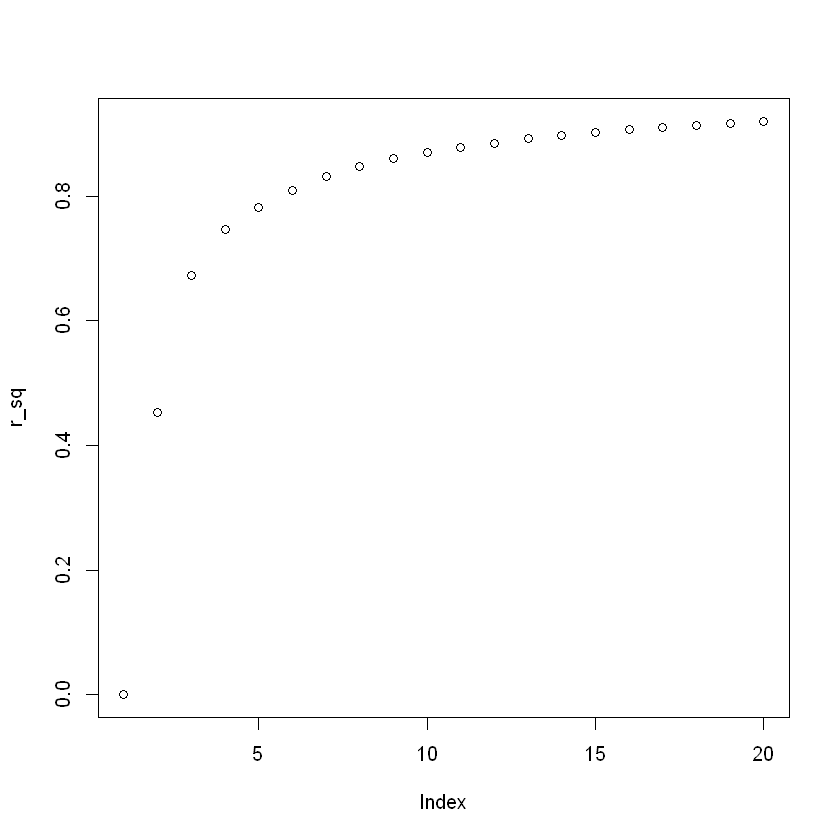

In [49]:
plot(r_sq)

##### We can apply K-Means for k=4, 5 and 6

In [50]:
clus4 <- kmeans(RFM_norm, centers = 4, nstart = 50, iter.max = 50)

In [51]:
clus5 <- kmeans(RFM_norm, centers = 5, nstart = 50, iter.max = 50)

In [52]:
clus6 <- kmeans(RFM_norm, centers = 6, nstart = 50, iter.max = 50)

#### Appending the ClusterIDs to RFM Data

In [53]:
RFM_km <-cbind(RFM,clus5$cluster)

In [54]:
colnames(RFM_km)[5] <- "ClusterID"

#### Cluster Analysis

In [55]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [56]:
km_clusters <- group_by(RFM_km, ClusterID)

In [57]:
tab1 <- summarise(km_clusters, Mean_amount = mean(Amount), Mean_freq = mean(Freq), Mean_recency = mean(Recency))

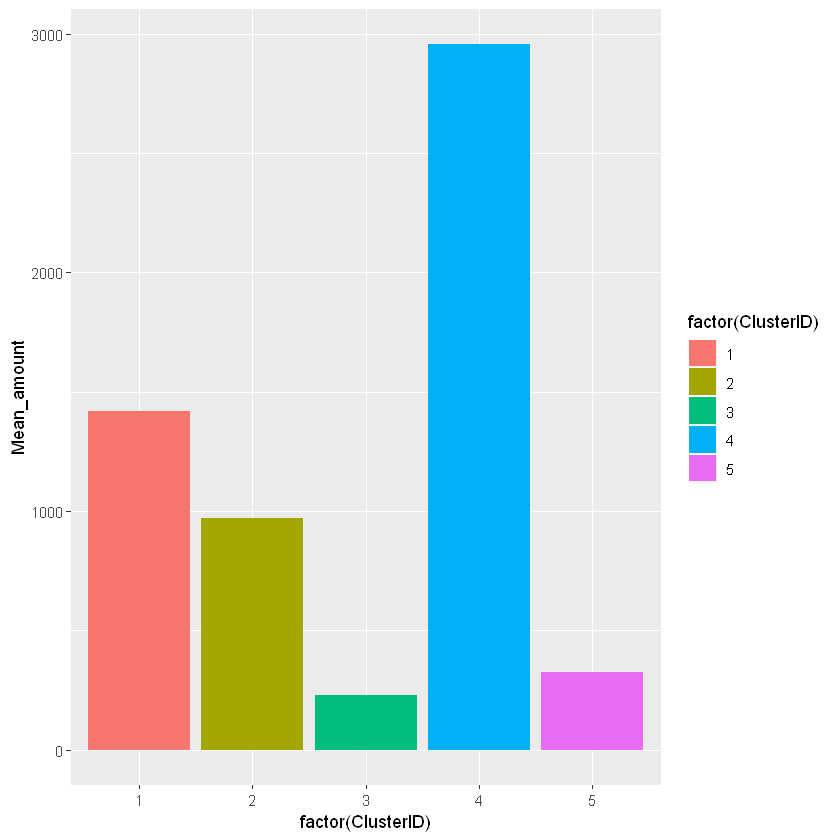

In [58]:
ggplot(tab1, aes(x = factor(ClusterID), y = Mean_amount)) + geom_bar(stat = "identity", aes(fill = factor(ClusterID)))

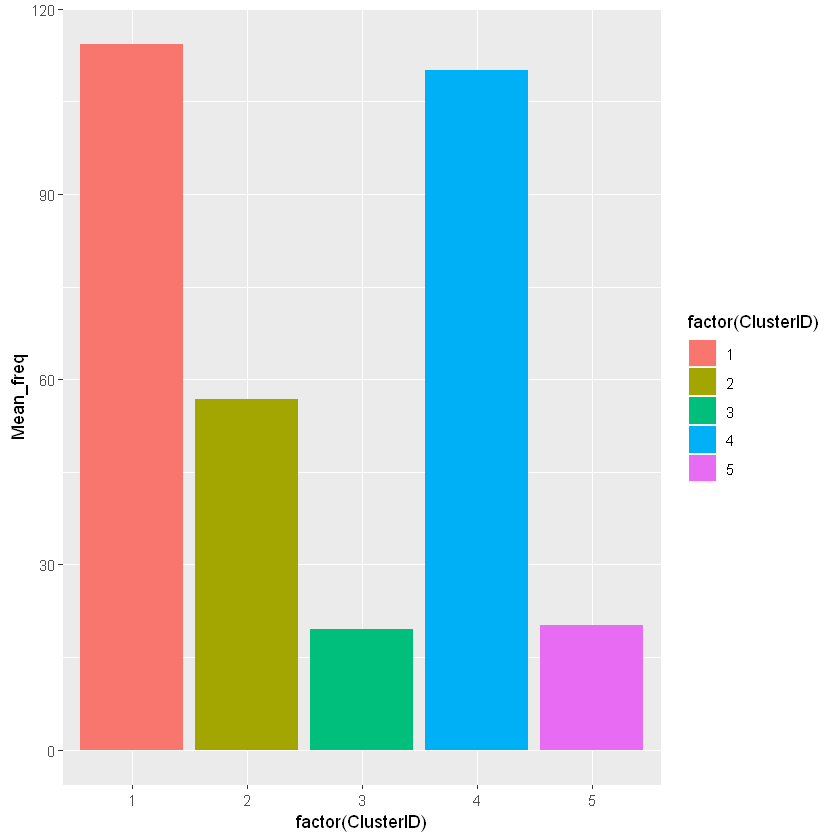

In [59]:
ggplot(tab1, aes(x = factor(ClusterID), y = Mean_freq)) + geom_bar(stat = "identity", aes (fill = factor(ClusterID)))

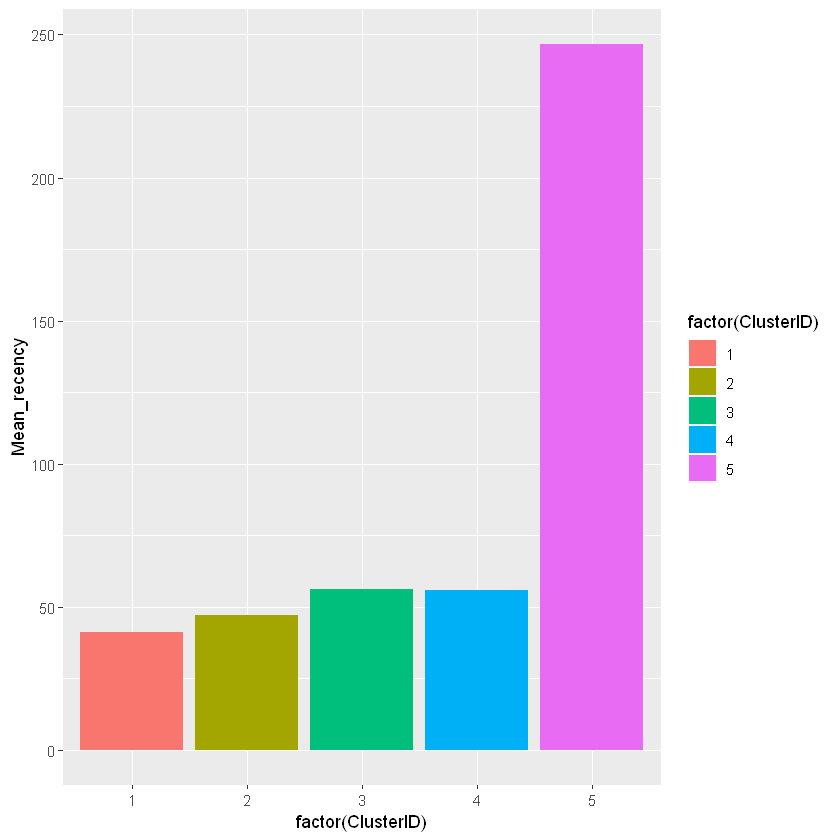

In [60]:
ggplot(tab1, aes(x = factor(ClusterID), y = Mean_recency)) + geom_bar(stat = "identity", aes(fill = factor(ClusterID)))

#### Hierarchial Clustering

##### Distance Matrix

In [61]:
RFM_dist <- dist(RFM_norm)
#RFM_dist

#### Constructing the dendrogram using single linkage

In [88]:
RFM_hclust1 <- hclust(RFM_dist, method = "single")

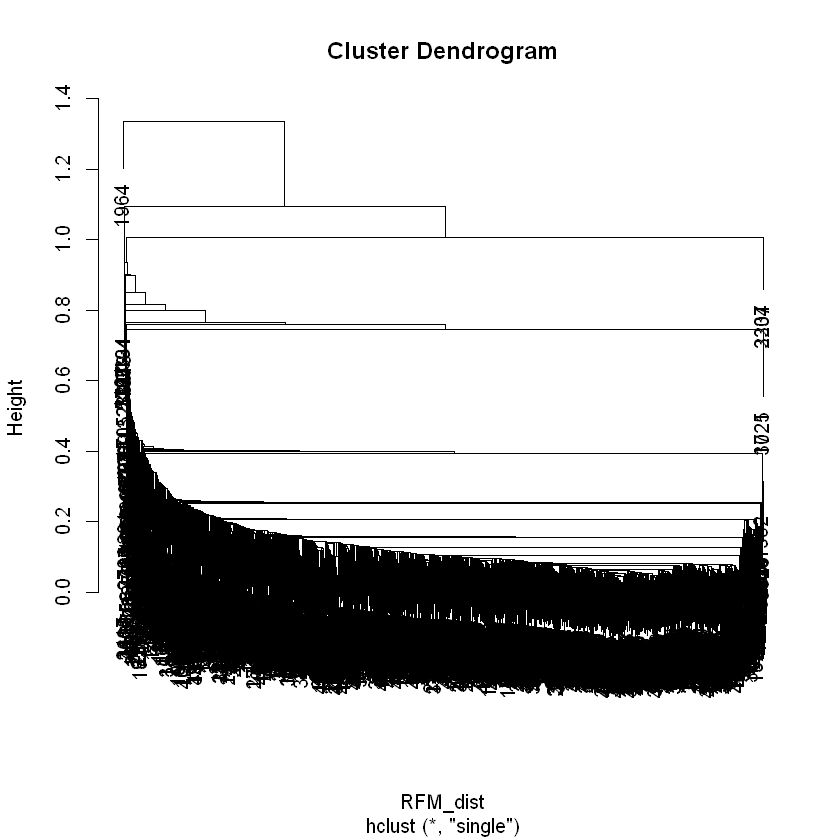

In [89]:
plot(RFM_hclust1)


In [64]:
hclust1<- as.dendrogram(RFM_hclust1)

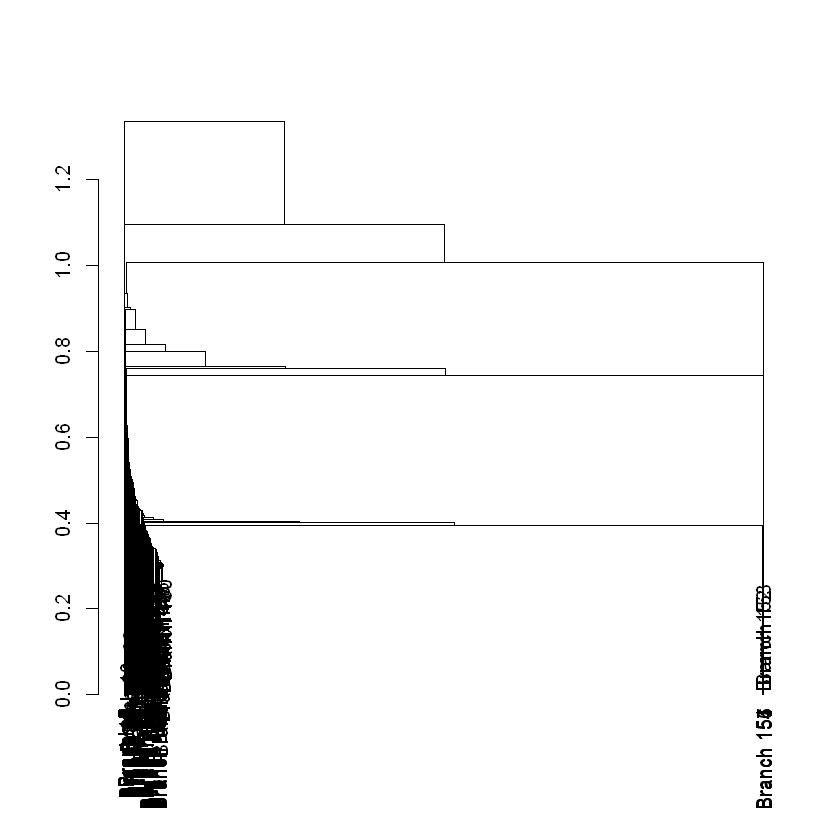

In [83]:
plot(cut(hclust1, h=0.3)$upper)

#### Constructing Dendrogram using complete linkage

In [65]:
RFM_hclust2 <- hclust(RFM_dist, method = "complete")

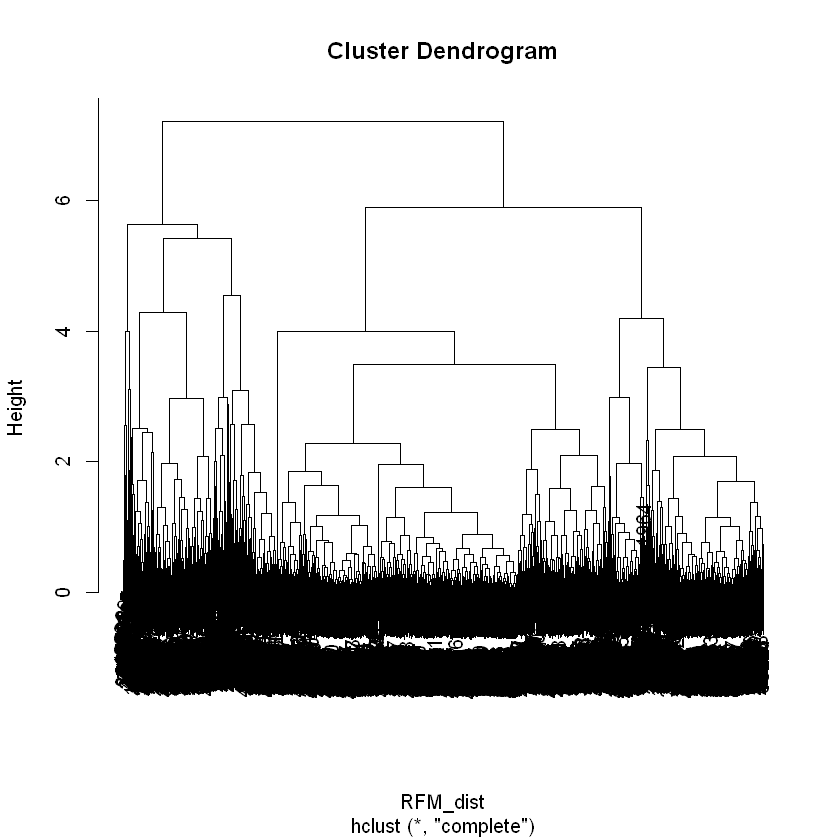

In [85]:
plot(RFM_hclust2)

In [86]:
hclust2<- as.dendrogram(RFM_hclust2)

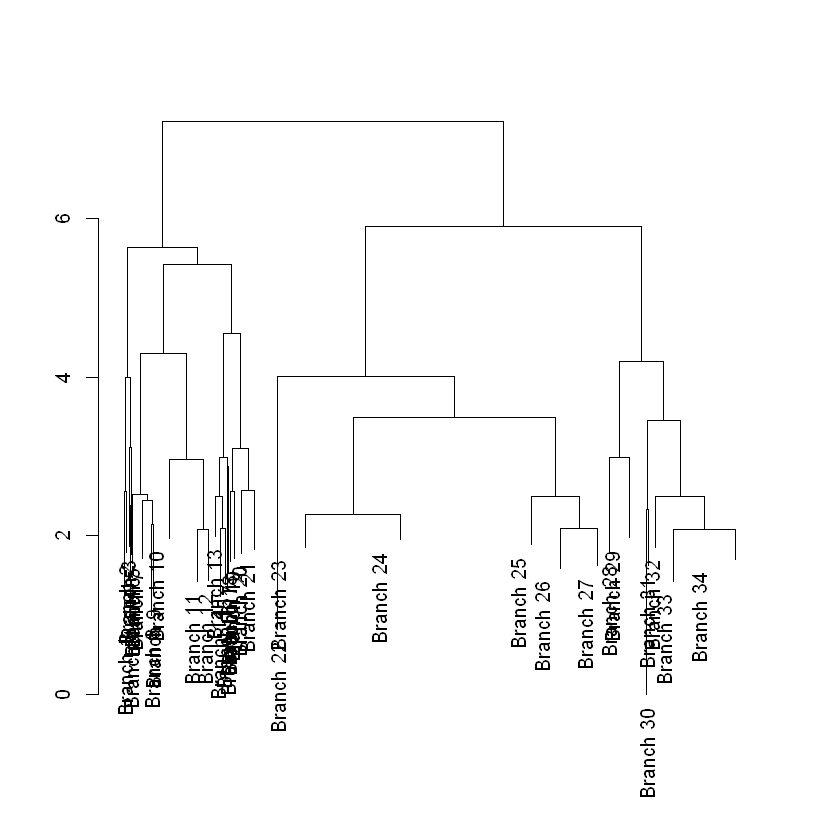

In [91]:
plot(cut(hclust2, h=2)$upper)

#### Visualising the cut in the dendrogram

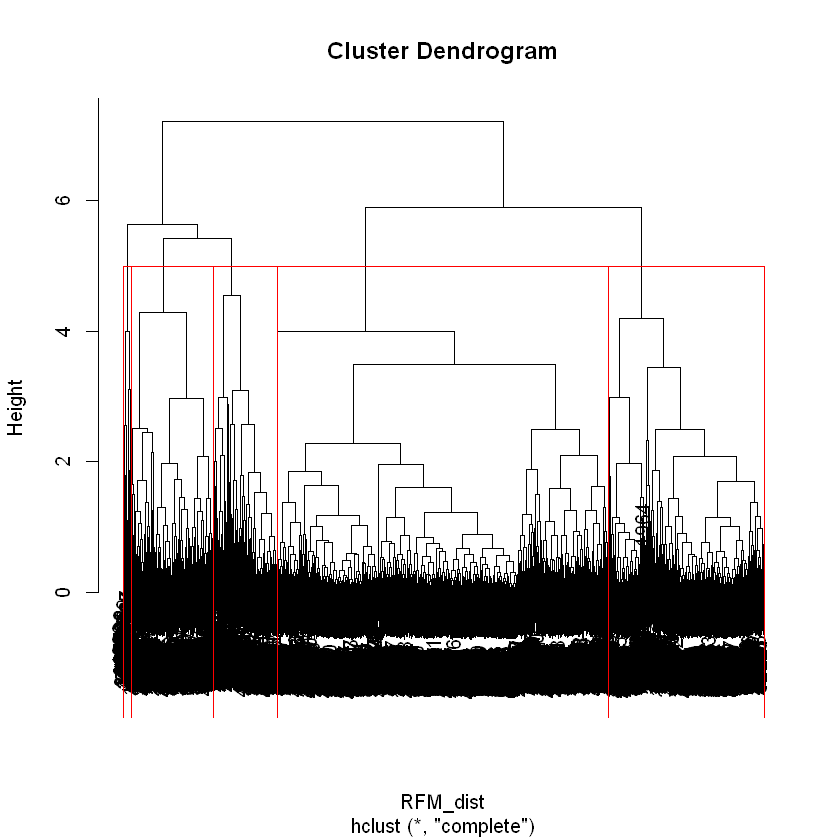

In [67]:
plot(RFM_hclust2)
rect.hclust(RFM_hclust2, k = 5, border = "red")

####  Making the cut in the dendrogram

In [68]:
clusterCut <- cutree(RFM_hclust2, k=5)

#### Function to compute average silhouette for k clusters


In [69]:
avg_sil <- function(k){
    km.res <- kmeans(RFM_norm, centers = k, nstart = 25 )
    ss <- silhouette(km.res$cluster, dist(RFM_norm))
    mean(ss[, 3])
}


#### Compute and plot wss for k = 2 to k = 15

In [70]:
k.values <- 2:15

#### Extract Avg Silhouette for 2-15 clusters

In [71]:
avg_sil_values <- map_dbl(k.values, avg_sil)

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"

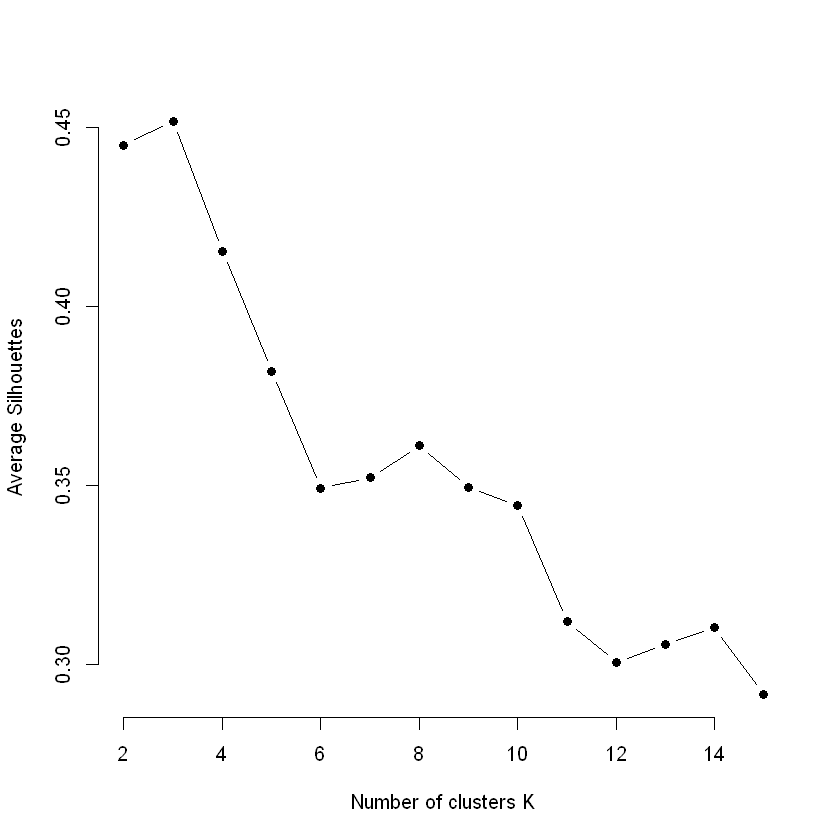

In [72]:
plot(k.values, avg_sil_values, type = "b", pch = 19, frame = FALSE, xlab = "Number of clusters K", ylab = "Average Silhouettes")